# Import Libraries

In [1]:
from libraries import *
from sklearn.utils import resample

# Load Data

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset-pcp.csv')

# Balancing the Class

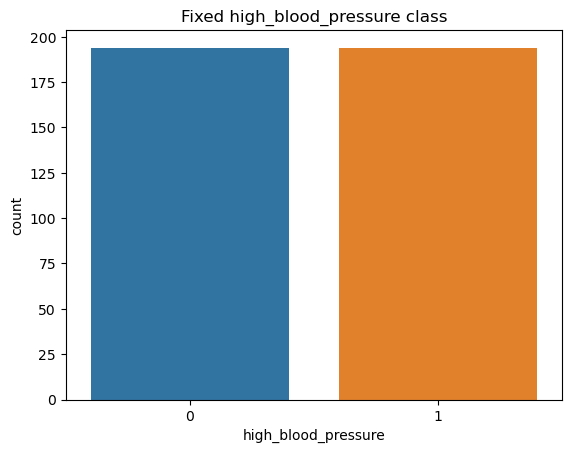

In [3]:
# Separate majority and minority classes
no_high_blood_pressure = df[df['high_blood_pressure'] == 0]
high_blood_pressure = df[df['high_blood_pressure'] == 1]

# Upsample minority class
high_blood_pressure_upsampled = resample(high_blood_pressure,
                                         replace=True,
                                         n_samples=len(no_high_blood_pressure),  # match number in majority class
                                         random_state=27)  # reproducible results

# Combine upsampled minority class with majority class
upsampled = pd.concat([high_blood_pressure_upsampled, no_high_blood_pressure])

sns.countplot(x='high_blood_pressure', data=upsampled).set(title='Fixed high_blood_pressure class')
plt.show()

# Check new class counts
#upsampled['high_blood_pressure'].value_counts()

In [4]:
# Splitting the dataset
# labels
y = upsampled['high_blood_pressure']

# features
X = upsampled.drop('high_blood_pressure', axis=1)

# Logistic Regression and Hyperparameter tuning

In [5]:
# Evaluation using Logistic Regression
from sklearn.model_selection import train_test_split
def train_and_evaluate_logistic_regression(X, y, polynomial_degree=2, test_size=0.2, random_state=42):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Hyperparameter tuning using GridSearchCV
    param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
    grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
    grid_search.fit(X_train_scaled, y_train)

    # Get the best logistic regression model from the grid search
    best_lr = grid_search.best_estimator_

    # Apply polynomial features
    poly = PolynomialFeatures(degree=polynomial_degree)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)

    # Train logistic regression on the polynomial features
    best_lr.fit(X_train_poly, y_train)

    # Make predictions on the test set
    y_pred_poly = best_lr.predict(X_test_poly)

  # Display the classification report
    report = classification_report(y_test, y_pred_poly)
    print(f"Classification Report (with Polynomial Features):\n{report}")

    return best_lr, report

best_lr, classification_report_result = train_and_evaluate_logistic_regression(X, y) 

Classification Report (with Polynomial Features):
              precision    recall  f1-score   support

           0       0.52      0.73      0.61        30
           1       0.78      0.58      0.67        48

    accuracy                           0.64        78
   macro avg       0.65      0.66      0.64        78
weighted avg       0.68      0.64      0.65        78



In [ ]:
best_lr.intercept_[0]

# Support Vector Machine

In [10]:
# Evaluation using Support Vector Machine
def train_svm(X, y, kernel='linear', C=1.0, gamma='scale', test_size=0.2, random_state=None):

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Create an SVM classifier with the specified parameters
    clf = svm.SVC(kernel=kernel, C=C, gamma=gamma)

    # Train the SVM classifier
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Generate a classification report
    classification_rep = classification_report(y_test, y_pred)

    return clf, X_train, X_test, y_train, y_test, accuracy, classification_rep


In [11]:
trained_svm, X_train, X_test, y_train, y_test, accuracy, classification_rep = train_svm(X, y, kernel='linear', C=1.0, gamma='scale', test_size=0.2, random_state=42)

# Display the classification report
print("Accuracy on the test set:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy on the test set: 0.5769230769230769
Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.50      0.48        30
           1       0.67      0.62      0.65        48

    accuracy                           0.58        78
   macro avg       0.56      0.56      0.56        78
weighted avg       0.59      0.58      0.58        78



# Gaussian Naive Bayes

In [12]:
# Evaluation using Gaussian Naive Bayes
# Get training and testing data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model 
naive_bayes = GaussianNB()

# Fit the model 
naive_bayes.fit(X_train, y_train)

# Get predictions on the test set 
y_hat = naive_bayes.predict(X_test)



In [13]:
# Display classification report
print('\nClassification Report:\n', classification_report(y_test, y_hat))



Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.57      0.55        30
           1       0.72      0.69      0.70        48

    accuracy                           0.64        78
   macro avg       0.62      0.63      0.63        78
weighted avg       0.65      0.64      0.64        78



# Saving the Model

In [ ]:
# Save the trained model to a file using pickle
with open('hbp_model.pkl', 'wb') as file:
    pickle.dump(best_lr, file)